In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../nyc_data.csv')
df.head()

,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit
0,60912,CONFIDENTIAL,Confidential,2016-04-29T00:00:00.000,2016-04-29T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
1,60914,CONFIDENTIAL,Confidential,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
2,60917,CONFIDENTIAL,Confidential,2016-04-19T00:00:00.000,2016-04-19T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
3,60919,CONFIDENTIAL,Confidential,2016-04-26T00:00:00.000,2016-04-26T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26T00:00:00.000,2023-04-18T00:00:00.000,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c


In [4]:
print(df.describe())

         project_id  extremely_low_income_units  very_low_income  \
count   3634.000000                 3634.000000      3634.000000   
mean   70150.063566                    9.285360        16.686296   
std     3655.044438                   36.481356       225.380706   
min    60912.000000                    0.000000         0.000000   
25%    67748.500000                    0.000000         0.000000   
50%    70539.500000                    0.000000         0.000000   
75%    73220.750000                    0.000000         0.000000   
max    75733.000000                  572.000000     11413.000000   

       low_income_units  moderate_income  middle_income        other  \
count       3634.000000      3634.000000    3634.000000  3634.000000   
mean          15.976059         3.263897       6.781783     0.207760   
std           98.501496        24.093096      23.985613     0.672724   
min            0.000000         0.000000       0.000000     0.000000   
25%            0.000000    

In [5]:
# Get value counts for categorical columns
categorical_cols = ['program_group', 'extended_affordability_status', 'prevailing_wage_status', 'planned_tax_benefit']
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Value counts for categorical columns:

Column: program_group
program_group
Multifamily Incentives Program    1928
Confidential                      1052
Multifamily Finance Program        632
Small Homes Program                 22
Name: count, dtype: int64

Column: extended_affordability_status
extended_affordability_status
No     3423
Yes     211
Name: count, dtype: int64

Column: prevailing_wage_status
prevailing_wage_status
Non Prevailing Wage    3575
Prevailing Wage          59
Name: count, dtype: int64

Column: planned_tax_benefit
planned_tax_benefit
421a             1853
Article XI        276
420c              274
Article II         23
Article V          17
420a               11
J-51 Enriched       9
J-51                9
UDAAP               3
Article IV          3
Name: count, dtype: int64


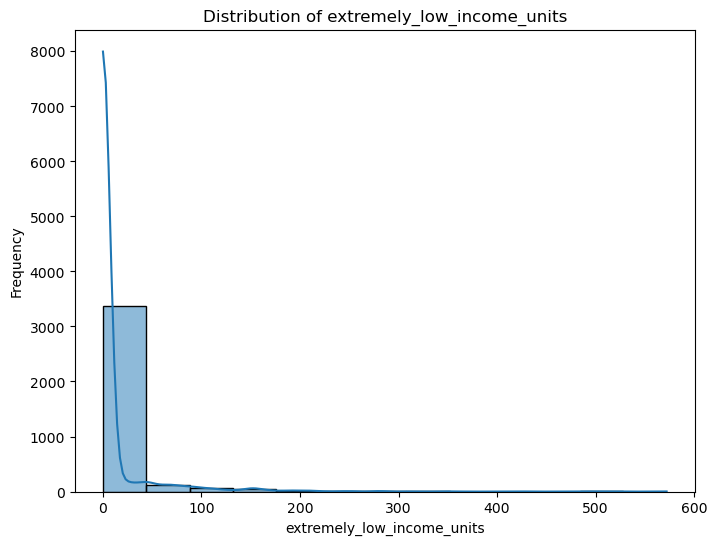

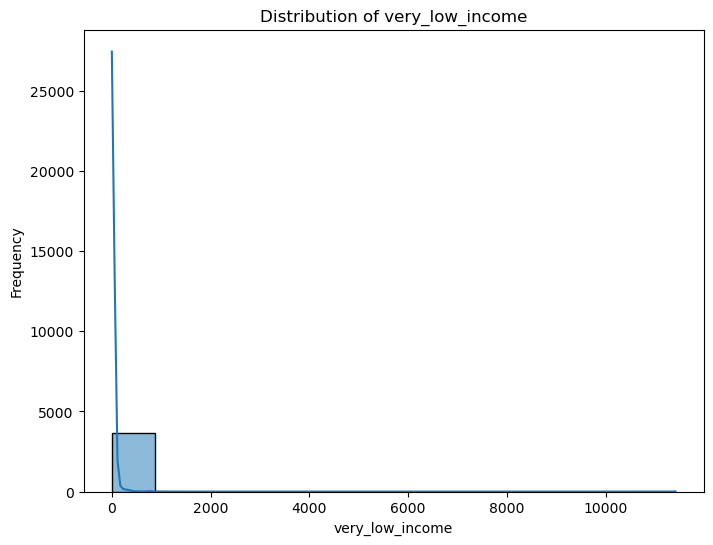

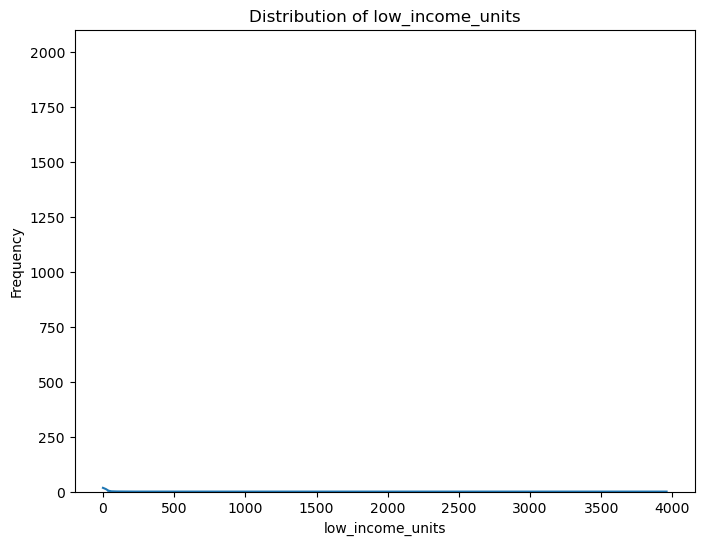

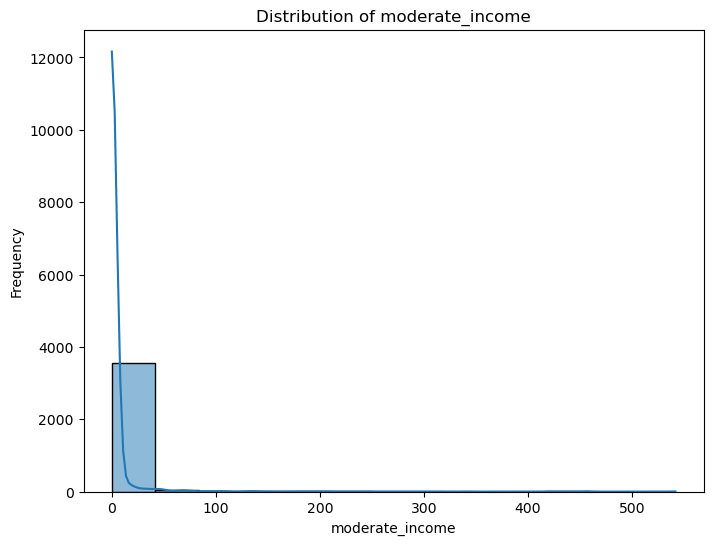

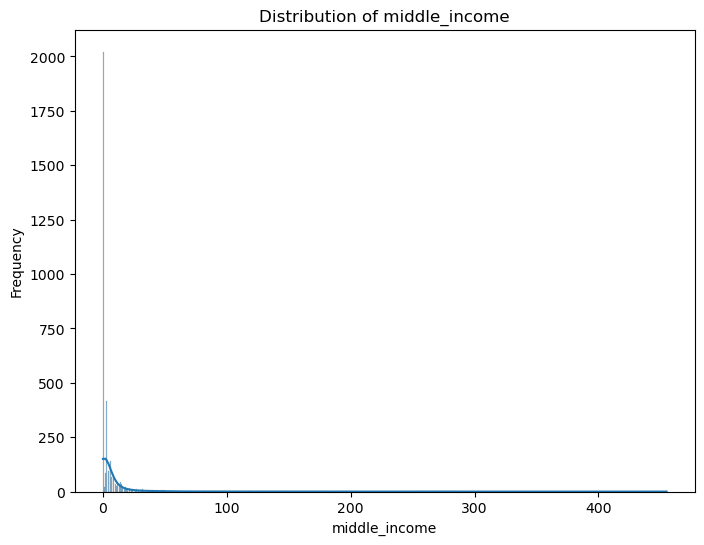

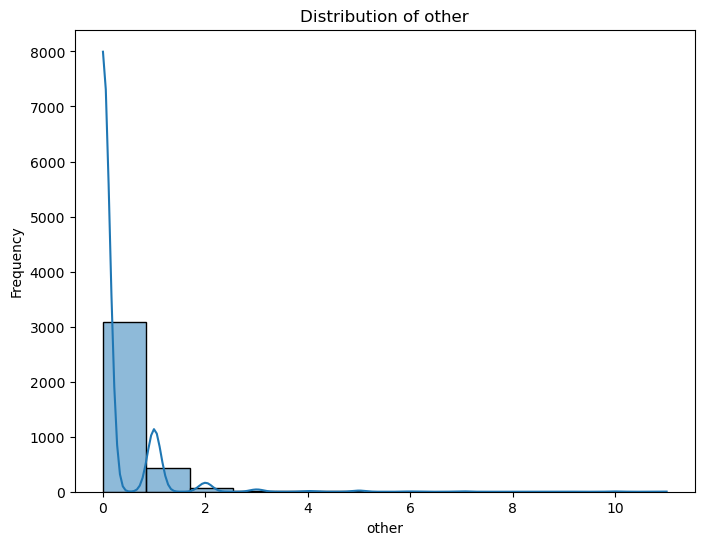

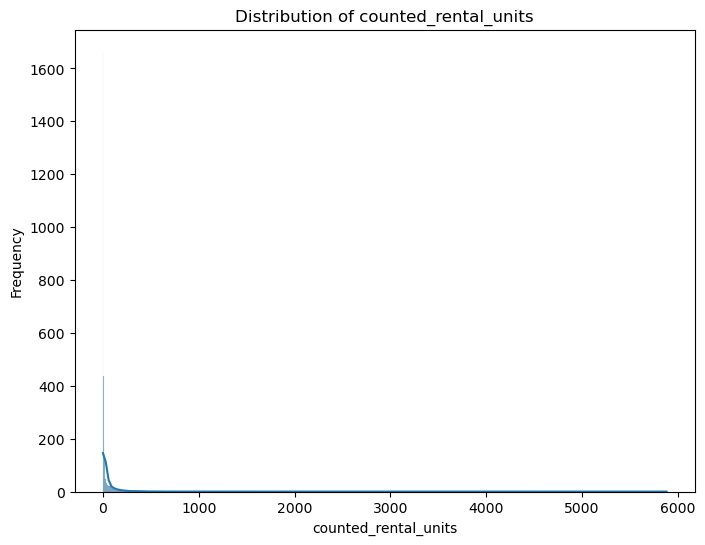

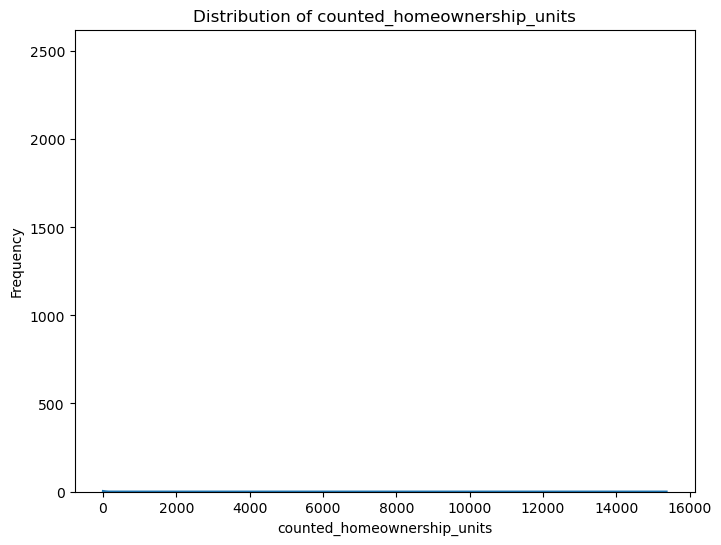

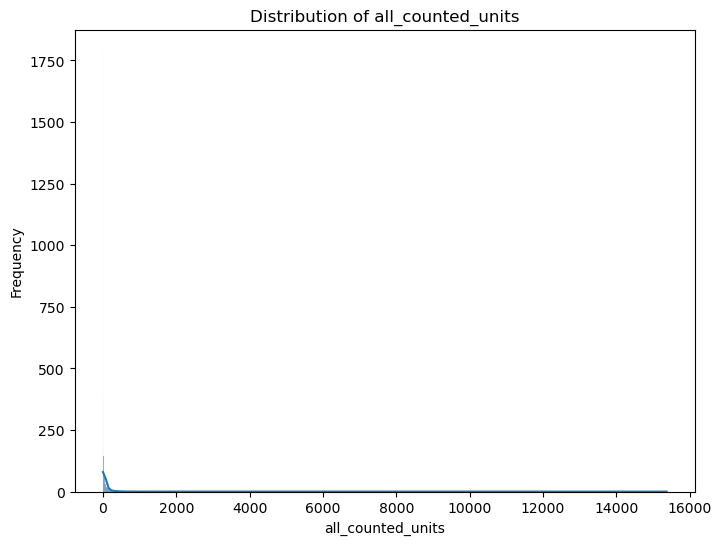

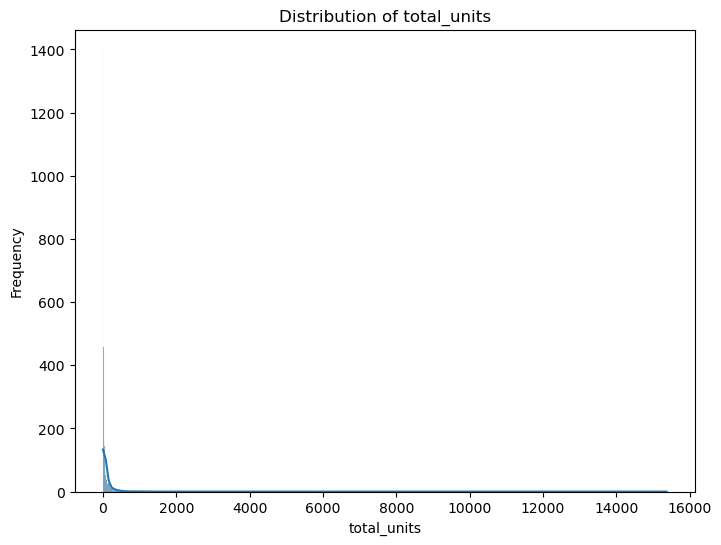

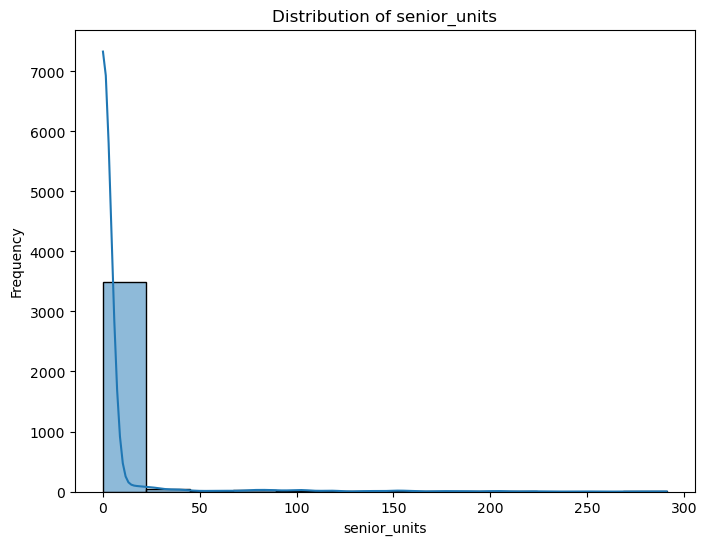

In [6]:
# Visualize distributions of numerical columns (histograms)
numerical_cols = ['extremely_low_income_units', 'very_low_income', 'low_income_units', 'moderate_income', 'middle_income', 'other', 'counted_rental_units', 'counted_homeownership_units', 'all_counted_units', 'total_units', 'senior_units']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

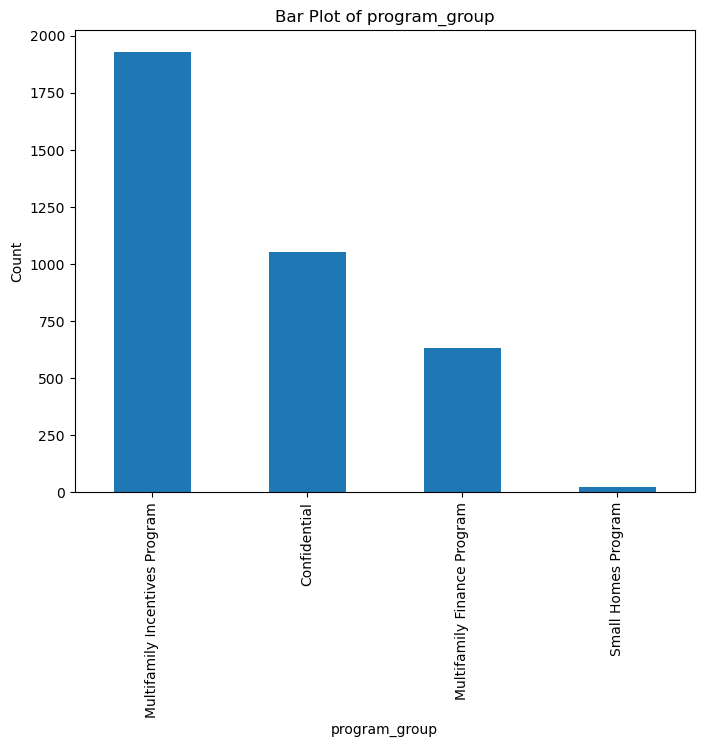

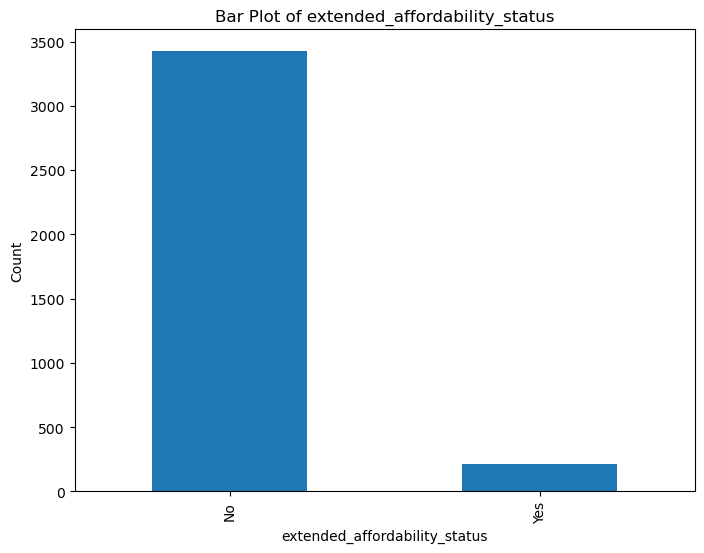

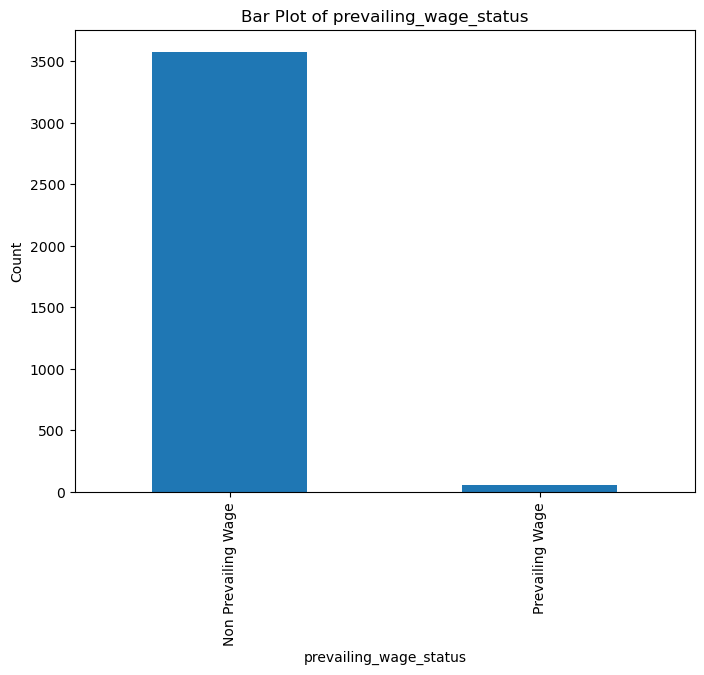

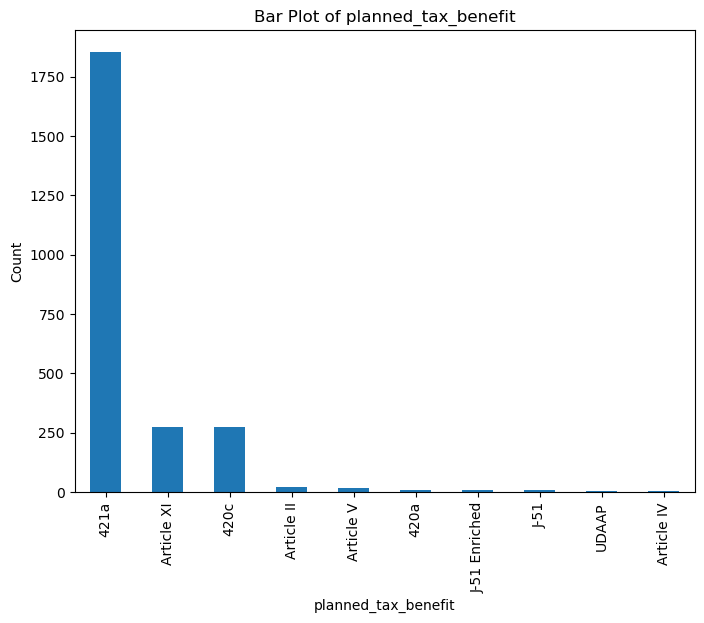

In [7]:
# Visualize distributions of categorical columns (bar plots)
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

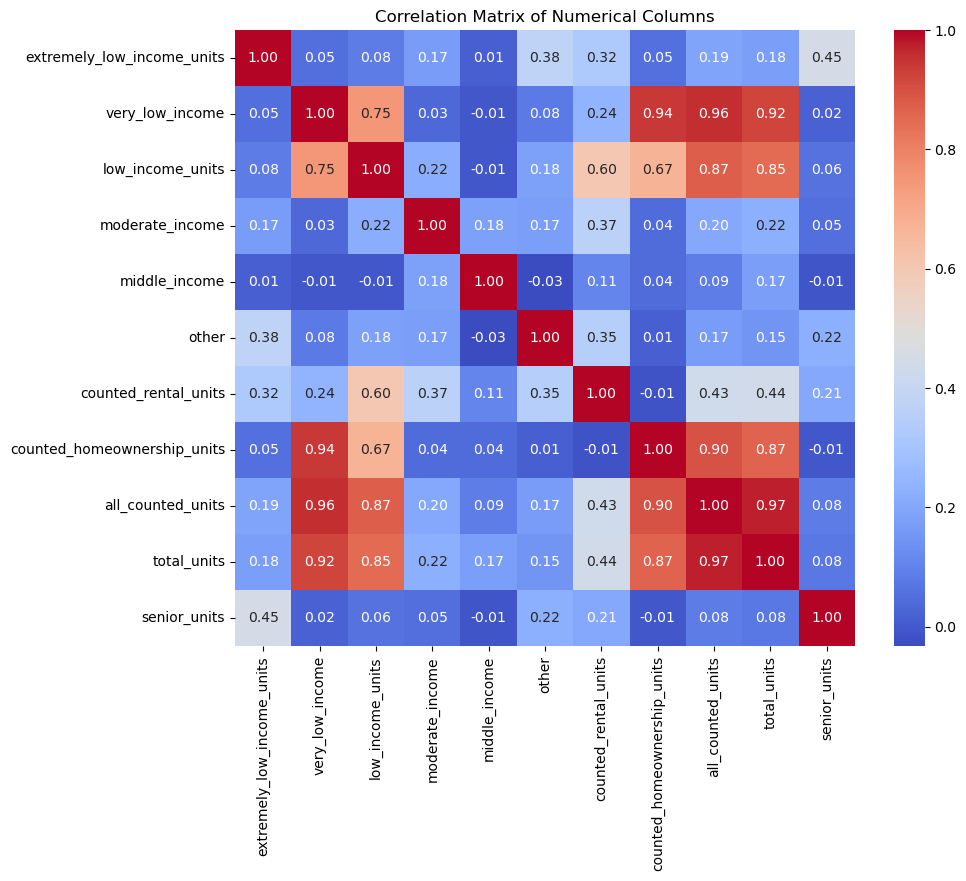

In [8]:
# Bivariate Analysis: Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

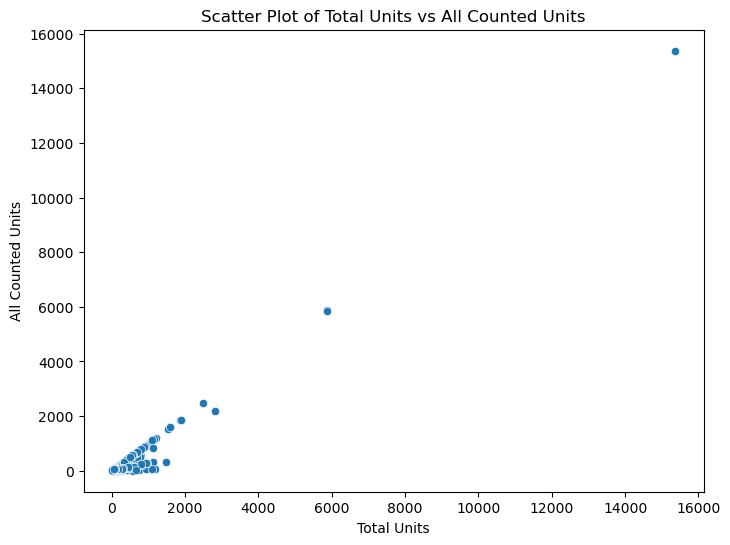

In [9]:
# Bivariate Analysis: Scatter plot of 'total_units' vs 'all_counted_units'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_units', y='all_counted_units', data=df)
plt.title('Scatter Plot of Total Units vs All Counted Units')
plt.xlabel('Total Units')
plt.ylabel('All Counted Units')
plt.show()

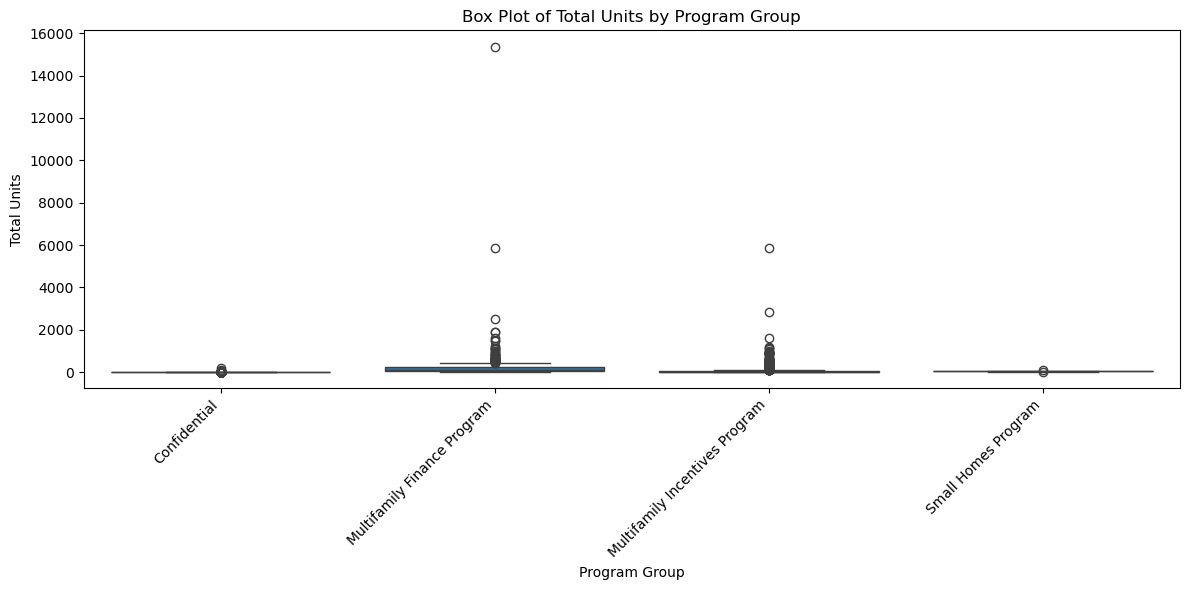

In [10]:
# Bivariate Analysis: Boxplot of 'total_units' by 'program_group'
plt.figure(figsize=(12, 6))
sns.boxplot(x='program_group', y='total_units', data=df)
plt.title('Box Plot of Total Units by Program Group')
plt.xlabel('Program Group')
plt.ylabel('Total Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()